In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
dataset = pd.read_csv("/content/drive/MyDrive/churn_dataset.csv")

In [73]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
# check missing data
dataset.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,11
Churn,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_Yes,0


In [76]:
# check duplicate customer
dataset.duplicated().sum()

0

In [77]:
#Droping unwanted feature
dataset.drop(columns=['customerID'],inplace=True)

In [78]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [79]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3555
Female    3488
Name: count, dtype: int64
********************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
********************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
********************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
********************
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
********************
DeviceProtection
No                     3

#### Replacing 'No internet service' and 'No phone service' with 'No'

In [80]:
dataset.replace(['No internet service','No phone service'], 'No', inplace=True)

In [81]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3555
Female    3488
Name: count, dtype: int64
********************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
********************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
********************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
********************
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
********************
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
********************
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
********************
StreamingTV
No     4336
Yes    2707
Name:

# EDA

Text(0.5, 1.0, 'Gender vs Churn')

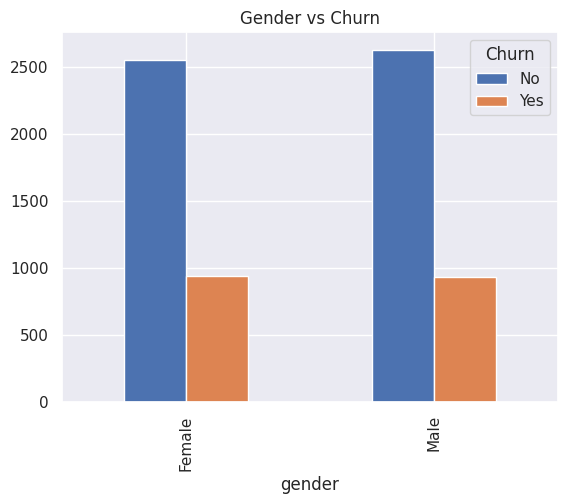

In [82]:
# Relation between Gender vs Churn
gender_wise = pd.crosstab(dataset['gender'], dataset['Churn'])
gender_wise.plot(kind='bar')
plt.title("Gender vs Churn")

# Handling Char/Object value

In [83]:
#Encoding categorical features

categorical_features = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  dataset = pd.get_dummies(dataset, columns=[i],drop_first=True,dtype='int64')


In [94]:
dataset.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,2
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   PhoneService_Yes                       7043 non-null   int64  
 9   MultipleLines_Yes                      7043 non-null   int64  
 10  InternetService_Fiber optic            7043 non-null   int64  
 11  Inte

In [89]:
# mapping
dataset['Churn'] = np.where(dataset['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

In [90]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

#### Handling missing value

In [111]:
dataset[dataset['TotalCharges'].isnull()]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
488,0,0,52.55,NaN,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0
753,0,0,20.25,NaN,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
936,0,0,80.85,NaN,0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0
1082,0,0,25.75,NaN,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1340,0,0,56.05,NaN,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0
3331,0,0,19.85,NaN,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3826,0,0,25.35,NaN,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4380,0,0,20.00,NaN,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5218,0,0,19.70,NaN,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
6670,0,0,73.35,NaN,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0


In [113]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370,0.504756,0.483033,0.299588,0.903166,0.421837,0.439585,0.216669,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,2.177623
std,0.368612,24.559481,30.090047,2265.270398,0.441561,0.500013,0.499748,0.458110,0.295752,0.493888,0.496372,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,1.932502
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [112]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

In [93]:
condition = [((dataset.tenure >= 0)&(dataset.tenure <= 12)), ((dataset.tenure > 12)&(dataset.tenure <= 24)),
             ((dataset.tenure > 24)&(dataset.tenure <= 36)),((dataset.tenure > 36)&(dataset.tenure <= 48)),
             ((dataset.tenure > 48)&(dataset.tenure <= 60)), (dataset.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
dataset['tenure_range'] = np.select(condition, choice)

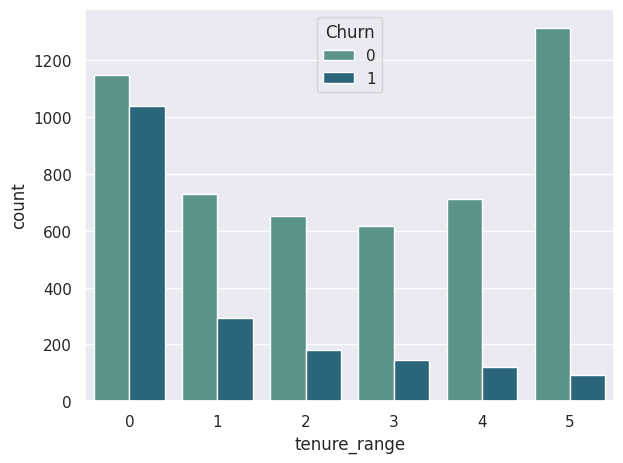

In [95]:
sns.countplot(x= 'tenure_range', hue='Churn', data=dataset, palette='crest', order=choice)
plt.tight_layout()

#### We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.